# Необходимые понятия из теории вероятности

### Вопрос: что такое вероятность? (Напишите в чат)

### Вероятность
Более строгое расмотрение верятности через теорию измерения (measure theroy):   
https://www.youtube.com/playlist?list=PL17567A1A3F5DB5E4

#### Частотная трактовка (frequentist):
Предел относительной частоты наблюдения некоторого события в серии однородных независимых испытаний.

#### Баесовская  трактовка (bayesian):
Степень уверенности в истинности суждения. Используется,что оцифровать неопределенность относительно некоторых событий.

#### Пример 1:
Подбрасываем монетку честную монетку (равноверятно приземляется орлом и решкой)   
**Частотная трактовка**: если мы подбросим монетку много раз, то она приземлится в половине случаев орлом   
**Баесовская  трактовка**: мы верим, что в 50%  случаев она приземлится орлом.   

#### Пример 2:
Вероятность, что сборная России победит на чемпионате следуещем  мира.   
**Частотная трактовка**: здесь не применима, так как мы не можем провести много подобных экспериментов   
**Баесовская  трактовка**: мы можем как-то оцифровать нашу степень неопределенности относительно данного события. В machine learning используется баесовская трактовка вероятности.   

Основные правила вероятности одинаковые в не зависимости от трактовки.

## Базовые определения

**Элементарным исходом** (или элелементарным событием) называют любой простейший 
(т.е. неделимый в рамках данного опыта) исход опыта.   
**Пример.** Выпадение герба после подбрасывания монеты.

Множество всех элементарных исходов будем называть **пространством элементарных исходов**.   
**Пример.** Шесть граней игральной кости.

Любой набор элементарных исходов называют **событием**.   
**Пример.** Выпадение четного числа на игральной кости

**Вероятность** события будем представлять числом p, которое принимает значение от 0 до 1.   

Некоторые свойства:
1. p(x)=1 - означатает, что мы уверены, что событие точно произойдет   
2. p(y)=0 - означате, что мы точно уверены, что событие не произойдет   
- $\sum_{x\ in\ dom} p(x) = 1 $   или будем писать так $\sum_x p(x) = 1 $   
- Вероятность совместного исхода двух событий p(x, y) = p(x and y) (например бросаем кость и одновременно выпадет четное и простое число)
- Вероятность объединения двух событий $p(x\cup y)=p(x)+p(y)-p(x, y) = p(x\ or \ y)$
- Условная вероятность: $p(x | y)={p(x, y)} / p(y) $
- если p(x, y) = p(x) p(y) -- события называются независимыми   

### Теорема Баесса для событий
$p(x, y) = p(y | x)p(x) = p(x | y)p(y) $ (определение условной вероятности)   
$p(y | x)= p(x | y)p(y) / p(x)$

**Случайная величина** — это переменная, значения которой представляют собой исходы какого-нибудь случайного феномена или эксперимента. (численное выражение результата случайного события). Чуть более формально -- функция которая переводит пространство элементарных событий в число. Как правило случайные величины обозначают большими буквами.

**Пример 1**. Монетка.   

|Элементарное событие|число|вероятность
| :---|---|---|
|орел|1|0.5|
|решка|0|0.5|

**Пример 1**. Игральная кость (каждая сторона выпадает равновероятно).   
A - случайная величина, которая показывает какое число выпало   
B - случайная величина, которая которая равна 1 если выпало четное число, 0 если нечетное   
С - случайная величина, которая которая равна 1 если простое число, иначе 0

|Элементарное событие|A|B|C|Вероятность
|---|---|---|---|---
|1|1|0|0|1/6|
|2|2|1|1|1/6|
|3|3|0|1|1/6|
|4|4|1|0|1/6|
|5|5|0|1|1/6|
|6|6|1|0|1/6|

p(A=1) = 1/6   
p(B=1) = 3/6 = 1/2   
p(C=1) = 3/6 = 1/2   
p(A=1, B=1) = 1/6   
p(B=0, C=1) = ?? (вероятность, что число не четное и простое)


**замечание**   
правильно писать так p(X=x), но иногда сокращают p(x) или p(X)

### Функция распределения
Функцией распределения (вероятностей) случайной величины $X$ называют функцию $F(x)$, значение которой в точке $х$ равно вероятности события $\{X \le x\}$, т.е. события, состоящего из тех и только тех элементарных исходов $\omega$, для которых $X(\omega) \le х$:
$$F(x)=P\{X \le x\}.$$
Обычно говорят, что значение функции распределения в точке $х$ равно вероятности того, что случайная величина $X$
примет значение, меньшее $х$.

Свойства функции распределения
1. $0\leq F(X) \leq 1$  
2. $F(x_1) \leq F(x_2)$ при $x_1 < x_2$ (т.е. $F(x)$ — неубывающая функция)  
3. $F(-\infty) = \lim_{x\rightarrow -\infty} F(x)=0, F(\infty) = \lim_{x\rightarrow +\infty} F(x)=1$
4. $P\{x_1 < X \le x_2\} = F(x_2) - F(x_1)$

In [12]:
%matplotlib inline

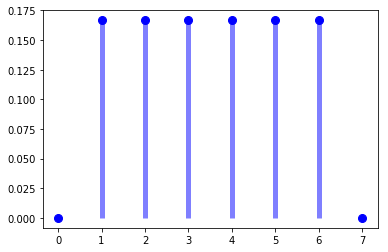

In [13]:
import numpy as np
import matplotlib.pyplot as plt

probs = np.zeros(8)
probs[1:7] = 1/6

plt.plot(np.arange(8), probs, 'bo', ms=8, label='dice pmf')
plt.vlines(np.arange(8), 0, probs, colors='b', lw=5, alpha=0.5)

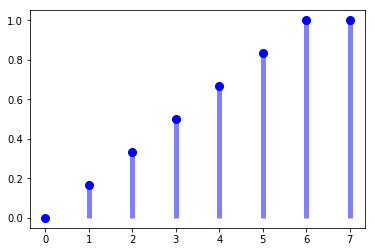

In [14]:
plt.plot(np.arange(8), np.cumsum(probs), 'bo', ms=8, label='dice pmf')
plt.vlines(np.arange(8), 0, np.cumsum(probs), colors='b', lw=5, alpha=0.5)

## Типа случайных величин
### Дискретные величины
Множество значений этой величины конечно или счетно. (например монетка, игральная кость).
Функция которая сопоставляет значению случайно величины ее вероятность называется **функция вероятности (probability mass function)**

### Непрерывные случайные величины
Множество значений этой величины любое число из какого-то отрезка.
Тут не можем определить функцию вероятностьи поэтому вводим определение **функция плотности вероятности (probability density function**).
Плотность распределения обладает следуюследующими свойствами:
1. $p(x)>0$
2. $P\{x_1 \leq X < x_2\} = \int\limits_{x_1}^{x_2}p(x)dx$
3. $\int\limits_{-\infty}^{+\infty}p(x)dx=1$
4. $P\{x \leq X < x + \Delta x\} \approx p(x)\Delta x$

<img src='p_x.png'>

## Важные свойства случайных величин (которые надо запомнить)
Пусть есть две случайные величины
- Независимость (условная независимость)
- маргинализация
- Chain rule для вероятности
- теорема Баесса

### Независимость
случайные величины независимы, если выполняется:
- $p(X=x, Y=y)=p(X=x)p(Y=y)$, для всех x,y
- условная независимость $p(X=x, Y=y\ |\ Z=z)=p(X=x\ |\ Z=z)\ p(Y=y\ |\ Z=z)$, для всех x,y, z

### Маргинализация
- $p(X=x) = \sum_y p(X=x, Y=y) = \sum_y p(X=x|Y=y)p(Y=y)$ -- дискретные случайные переменные
- $p(x) = \int p(x, y)dy= \int p(x\ |\ y)\ p(y) dy$ -- непрерывные случайные величины

### Chain rule для вероятности
$p(X^1, X^2, ...X^n) = p(X^1) \prod_{i=2}^np(X^i|X^1,X^2...X^{i-1})$   
пример $p(A,B,C) = p(A| B,C)p(B,C) = p(A| B,C)p(B|C)p(C)$

### Теорема Баесса
$p(A | B)= \frac{p(B | A)p(B)}{p(B)} = \frac{p(B | A)p(B)}{\sum_y p(A, B)}$

# Пример теоремы Баесса
Условия:
- 1% женщин имеют рак груди (99% не имеют)
- если рак есть, то мамография с 80% вероятностью найдет его (false negative ошибка 20%)
- если рака нет, то мамография с 9.6% вероятностью скажет, что он есть (false positive ошибка 9.6%)   

***Вопрос*** Какова вероятность, что у пацианта рак груди, если мамография сказала, что рак есть?

Как решаем:

**Шаг 1** Введем случаные величины   
A - 1 если рак есть, 0 если рака нет   
B - 1 мамография говорить есть рак, 0 говорит нет рака

** Шаг 2** Переформулируем условия задачи с помощью случайных величин
- 1% женщин имеют рак груди (99% не имеют)   
    $p(A=1) = 0.01$   
    $p(A=0) = 0.99$ 
- если рак есть, то мамография с 80% вероятностью найдет его (false negative ошибка 20%)   
    $p(B=1|A = 1) = 0.8$   
    $p(B=0|A = 1) = 0.2$   
- если рака не, то мамография с 9.6% скажет, что он есть (false positive ошибка)   
    $p(B=1|A = 0) = 0.096$   
    $p(B=0|A = 0) = 1 - 0.096$   

**Шаг 2** Сформулируем, что мы ищем   
$p(A=1\ |\ B=1)$

**Шаг 3** Запишем теорему Баесса   
$p(A=1\ |\ B=1) = \frac{(B=1\ |\ A=1)\ p(A=1)}{p(B=1)}$

**Шаг 4** Посмотрим, что нам известно, а что нет в правой части шага 3   
- $p(B=1\ |\ A=1)=0.8$
- $p(A=0.99) = 0.99$
- $p(B=1) = ?$

**Шаг 5** Распишем $p(B=1)$ через правило маргинализации   
$p(B=1) = p(B=1|A=0)p(A=0) + p(B=1|A=1)p(A=1) = 0.096 * 0.99 + 0.8 * 0.01$   

**Шаг 6** Посчитаем ответ   
$p(A=1\ |\ B=1) = \frac{0.8 * 0.99}{0.096 * 0.99 + 0.8*0.01} = 7.7\%$

In [4]:
pA1 = 0.01
pA0 = 1 - pA1
pB1A1 = 0.8
pB0A1 = 1 - pB1A1
pB1A0 = 0.096
pB0A1 = 1 - pB1A0

pB1A1 * pA1 / (pB1A0 * pA0 + pB0A1 * pA1)

0.07686395080707148

### Матожидание, дисперия

**Математическим ожиданием** (средним значением) $MX$ **дискретной случайной величины** $X$ называют сумму произведений значений $x_i$ случайной величины и вероятностей $p_i = Р\{Х = x_i\}$, с которыми случайная величина принимает эти значения: $$MX = \sum_ix_ip_i$$

**Математическим ожиданием** (средним значением) $MX$ **непрерывной случайной величины** называют интеграл $$MX=\int\limits_{-\infty}^{+\infty}xp(x)dx$$

**Дисперсией** $DX$ случайной величины $X$ называют математическое ожидание квадрата отклонения
случайной величины $X$ от ее среднего значения, т.е. $$DX=M(X-MX)^2$$

**Свойства дисперсии**
1. если случайная величина $X$ принимает всего одно значение $С$ с вероятностью единица, то $DC = 0$.
2. $D(aX + b) = a^2DX$
3. $DX=MX^2-(MX)^2$
4. $D(X+Y)=DX+DY$ для независимых случайных величин $X$ и $Y$

**Ковариация**

Пусть $(X_1, X_2)$ — двумерный случайный вектор. **Ковариацией** (корреляционным моментом) $cov(X_1, X_2)$
случайных величин $Х_1$ и $Х_2$ называют математическое ожидание произведения случайных величин $\mathring{X}_1 = Х_1- МХ_1$ и $\mathring{X}_2 = Х_2 - МХ_2$

$$cov(X_1, Х_2) = М(\mathring{Х}_1\mathring{Х}_2) = М((Х_1 - МХ_1)(Х_2 - МХ_2))$$

Запишем формулы, определяющие ковариацию.

Для дискретных случайных величин $Х_1$ и $Х_2$:  
$$cov(X_1, Х_2) = \sum_{i,j}(x_i - MX_1)(x_j - MX_2)p_{ij}$$

Для непрерывных случайных величин $Х_1$ и $Х_2$:  
$$cov(X_1, Х_2) = \int\limits_{-\infty}{+\infty}\int\limits_{-\infty}{+\infty}(x_1-MX_1)(x_2-MX_2)p_{x_1x_2}(x_1,x_2)dx_1dx_2$$


Можно записать:
$$D(X+Y)=DX+DY+2cov(X,Y)$$

**Свойства ковариации**

1. $cov(X,X)=DX$
2. $cov(X_1,X_2)=0$ для независимых случайных величин $X_1$ и $X_2$
3. Если $Y_1 = a_1X_1+b_1$ и $Y_2 = a_2X_2+b_2$, то $cov(Y_1,Y_2) = a_1a_2cov(X_1,X_2)$
4. $-\sqrt{DX_1DX_2} \leq cov(X_1,X_2) \leq \sqrt{DX_1DX_2}$
5. Равенство $|cov(X_1X_2)|= \sqrt{DX_1DX_2}$ верно тогда и только тогда, когда случайные величины $Х_1$ и $Х_2$
связаны линейной зависимостью, т.е. существуют такие числа $a$ и $b$, при которых $X_2 = aX_1-b$.
6. $cov(X_1, X_2)=M(X_1X_2)-MX_1MX_2$

Случайные величины $X$ и $У$ называют некоррелированными, если их ковариация равна нулю: $$cov(X,Y)=0$$
**Матрицей ковариаций** (ковариационной матрицей) случайного вектора X называют матрицу
$$\Sigma=(\sigma_{ij})=(cov(X_iX_j))$$

Матрица ковариаций $\Sigma$ является симметрической

## Виды распределений и оценка параметров распределения

### Распределение Бернулли
Дискретное распределение, случайная величина может принимать 2 значения:
X - случайная величина
* значение 1 с вероятностью $\mu$
* значение 0 c вероятность  $1 - \mu$

Функция вероятности имеет вид:   
$p(x) = \mu^x(1-\mu)^{1-x}$

посчитаем матожидание случайно величины:   
$MX = 1 * \mu + 0 * (1 - \mu) = \mu$

## Оценка параметров распределения методом максимального правдоподобия

- есть набор данных $D = ({x_1, x_2, ... x_N})$   
- Каждое $x_i$ принимает значение 0 или 1 (реализация случайно величины бурнулли)
- пусть $x_i$  реализации одинаковых, независимых  случайных переменных (independent, identically distributed - iid)

**Правдоподобие** - вероятность данных (это функци от параметров распределения)   
$p(D|\mu) = \prod_{i=1}^N \mu^{x_i} (1-\mu)^{1-x_i}$   - хотим максимизировать по $\mu$   
$log(p(D|\mu)) = \sum_{i=1}^N x_ilog(\mu) + (1-x_i)log(1-\mu)$   
$N_0$ - сколько  $x_i$ равно 0, $N_1$ - сколько  $x_i$ равно 1

$log(p(D|\mu)) = N_1 log(\mu) + N_0 log(1-\mu)$   
$log(p(D|\mu))' = N_1 / \mu - N_0 / (1-\mu)$ = 0    
$ \mu = N_1 / (N_1 + N_0) = N_1 / N$

### Биномиальное распределение
Дискретное распределение, случайная величина представляет собой количество успехов в серии n независимых экспериментов. Подбрасываем монетку 10 раз, какая вероятность, что будет 0, 1, 2 .. 10 орлов.

Более формально:

$X^i$ - независимые, одинакого распределенные случайные величины бернулли (одинаковые значение $\mu$)

Y - случайная величина, с биномиальным распределением

$Y = X^1 + X^2 + ... + X^n$

$Y = Bin(n, \mu)$   
$p(Y=m) = \begin{pmatrix}n\\m\end{pmatrix} \mu^m(1-\mu)^{n-m}$


### Категориальное распределение
Категориальное, случайная величина может принимать k значений (0...k-1), каждое с вероятностью $\mu_k$ 

$p(x) = \prod_{i=0}^{k-1}\mu_i^{[x=i]}$, где    
[x=i] = 1, если x=i, иначе 0    
$\mu_i \ge 0$    
$\sum\mu_i =1$

то есть это обобщение распределения бернулли    
если k=2, то получаем распределение бернулли:    
$\mu_0 = 1 - \mu$   
$\mu_1 = \mu$

### Мультиномиально распределение
обобщение биномиально распределения на случай более 2 исходов

$X^i$ - независимые, одинакого распределенные случайные категориальные величины

$Y = X^1 + X^2 + ... + X^n$

## Дополнительно почитать
- бета распределение (https://en.wikipedia.org/wiki/Beta_distribution)
- распределение Дирихле (https://en.wikipedia.org/wiki/Dirichlet_distribution)

### Равномерное распределение

Говорят, что случайная величина имеет непрерывное равномерное распределение на отрезке $ [a,b]$, где $a,b\in \mathbb {R} $, если её плотность $ p(x)$ имеет вид:

$$p(x)= \begin{cases}\frac{1}{b-a}, x \in [a, b] \\ 0, x \notin [a,b] \end{cases}$$

Плотность распределения
<img src="uniform_dist.png">

Функция распределения
<img src="uniform_f.png">

### Одномерное Нормальное распределение

Нормальное распределение, также называемое распределением Гаусса или Гаусса — Лапласа — распределение вероятностей, которое в одномерном случае задаётся функцией плотности вероятности, совпадающей с функцией Гаусса:

$$ p(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}\;e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}},$$


где параметр μ — математическое ожидание (среднее значение), медиана и мода распределения, а параметр σ — среднеквадратическое отклонение (σ ² — дисперсия) распределения
Плотность распределения
<img src="norm_dist.png">
Функция распределения
<img src="norm_f.png">

Центральная предельная теорема - сумма достаточно большого количества слабо зависимых случайных величин, имеющих примерно одинаковые масштабы (ни одно из слагаемых не доминирует, не вносит в сумму определяющего вклада), имеет распределение, близкое к нормальному.

### Многомерное Нормальное распределение
X - случайный вектор -- вектор из D случайных величин (D-мерный вектор)

$$ p(x)={\frac {1}{2\pi^{D/2}} \frac {1}{| \Sigma| ^{1/2} } exp(-0.5 (x-\mu)^T \Sigma^{-1}(x-\mu))} $$   
где $\mu$ -- D-мерный вектор средних   
где $\Sigma$ -- D на D матрица ковариации

# Нормальное распределение одномерное

In [7]:
%matplotlib inline

In [57]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

In [63]:
rv1 = norm(loc=0, scale=1)
rv2 = norm(loc=0, scale=2)
rv3 = norm(loc=1, scale=1)
rv4 = norm(loc=1, scale=2)

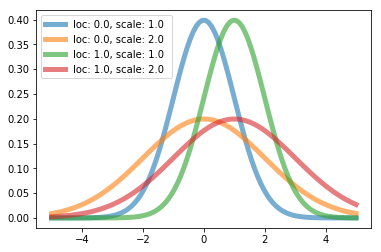

In [72]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(-5, 5, 100)

for rv in (rv1, rv2, rv3, rv4):
    ax.plot(x, rv.pdf(x), '-', lw=5, alpha=0.6, label=f'loc: {rv.mean()}, scale: {rv.std()} ')
ax.legend()

In [76]:
# sample from random distribution
rv1.rvs(10)

array([-0.75381165,  0.27286453, -0.34447389, -1.10647855,  0.47730853,
       -1.47731837, -0.19593328,  0.29396468, -0.73606821,  0.62316816])

In [83]:
from scipy.stats import multivariate_normal

# Распределение Гаусса двумерное

In [95]:
def plot2dgauss(m, cov):
    fig, ax = plt.subplots(1, 1)
    x, y = np.mgrid[-2:2:.01, -2:2:.01]
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x; pos[:, :, 1] = y
    rv = multivariate_normal(m, cov)
    plt.contourf(x, y, rv.pdf(pos))

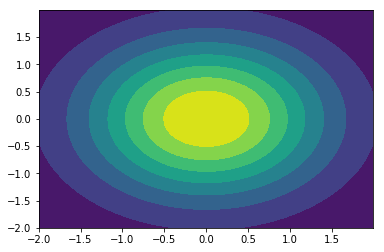

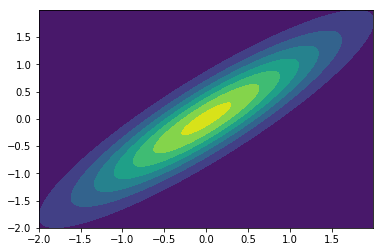

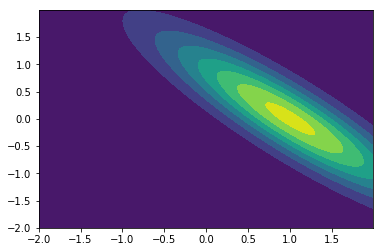

In [97]:
plot2dgauss([0, 0], [[1.0, 0], [0, 1]])
plot2dgauss([0, 0], [[1, 0.9], [0.9, 1]])
plot2dgauss([0, 0], [[1, -0.9], [-0.9, 1]])
plot2dgauss([1, 0], [[1, -0.9], [-0.9, 1]])

## Некоторые понятия из статистики

**Медиана** - середина отсортированного массива (упорядоченной выборки). Для распределения - значение, для которого вероятность получить число справа или слева от этого значения равны 1/2.  
**Мода** - значение во множестве наблюдений, которое встречается наиболее часто. Модой абсолютно непрерывного распределения называют любую точку локального максимума плотности распределения. Для дискретных распределений модой считают любое значение ai, вероятность которого pi больше, чем вероятности соседних значений.
**Среднее** - частное от деления суммы элементов выборки на количество элементов в выборке.  
**Квантиль** - значение, которое заданная случайная величина не превышает с фиксированной вероятностью. Для 50% - медиана. Для 25% и 75% - квартили. Еще типичные квантили - 95%, 99%, 99.9%

Впорос: где здесь среднее, а где медиана?

In [140]:
from scipy.stats import lognorm
s = 0.95

fig, ax = plt.subplots(1, 1)
x = np.linspace(lognorm.ppf(0.01, s), lognorm.ppf(0.99, s), 100)
y = lognorm.pdf(x, s)

ax.plot(x, y, 'r-', lw=5, alpha=0.6, label='lognorm pdf')
ax.vlines(lognorm.mean(s), 0, y.max())
ax.vlines(lognorm.median(s), 0, y.max())

Когда данные распределены не нормально или имеют хвосты и скажены, нам может быть не всегда интересно среднее, а более показательно будет медиана

**Коэффициентом корреляции** случайных величин $X$ и $У$ называют число $\rho = \frac{cov(X,Y)}{\sqrt{DX\cdot DY}}$

**Корреляционной (нормированной ковариационной) матрицей** случайного вектора $X$ называют матрицу $$P=(\rho_{ij})=(\rho(X_i, X_j))$$, состоящую из коэффициентов корреляций случайных величин $X_i$ и $X_j$.

Корреляционная матрица $Р$ порядка $n$ имеет вид 
$$P=\begin{bmatrix} 1 & \rho_{12} & ... & \rho_{1n} \\ \rho_{21} & 1 & ... & \rho_{2n} \\ ... & ... & ... & ... \\ \rho_{n1} & \rho_{n2} & ... & \rho_{nn} \end{bmatrix}$$

**Свойства коэффициента корреляции**
1. $\rho(X,X)=1$
2. Если случайные величины $X$ и $Y$ являются независимыми (и существуют $DX>0$ и $DY>0$), то $\rho(X,Y)=0$
3. $p(a_1X_1 + b_1, a_2X_2 + b_2) = \pm p(X_1,X_2)$. При этом знак плюс нужно брать в том случае, когда $а_1$ и $a_2$ имеют одинаковые знаки, и минус — в противном случае.
4. $-1 \leq \rho(X,Y) \leq 1$
5. $|\rho(X,Y)|=1$ тогда и только тогда, когда случайные величины $X$ и $Y$ связаны линейной зависимостью.



<img src='Correlation_examples2.svg'>

http://guessthecorrelation.com/

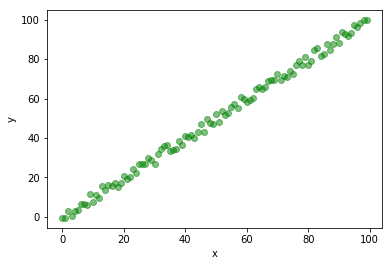

(0.9981460385126537, 5.938512954488938e-121)

In [142]:
from scipy.stats.stats import pearsonr

%matplotlib inline

x = np.arange(100)
delta = np.random.uniform(-3, 3, size=(100,))
y = x + delta
plt.scatter(x, y, c="g", alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.show()
pearsonr(x, y)

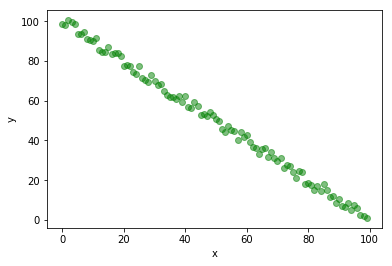

(-0.9980994678839413, 2.000563344035998e-120)

In [143]:
x = np.arange(100)
delta = np.random.uniform(-3, 3, size=(100,))
y = -x + 100 + delta
plt.scatter(x, y, c="g", alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.show()
pearsonr(x, y)

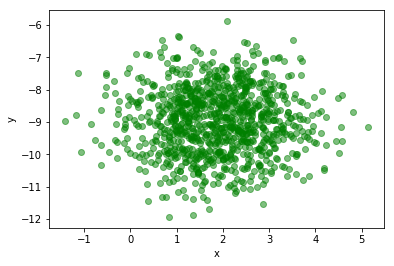

(-0.0015443817837974647, 0.9610973407997808)

In [144]:
from sklearn.datasets.samples_generator import make_blobs
data, _ = make_blobs(n_samples=1000, centers=1, n_features=2)
x = data[:, 0]
y = data[:, 1]
plt.scatter(x, y, c="g", alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.show()
pearsonr(x, y)

In [145]:
import pandas as pd
path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

mpg_data = pd.read_csv(path, delim_whitespace=True, header=None,
            names = ['mpg', 'cylinders', 'displacement','horsepower',
            'weight', 'acceleration', 'model_year', 'origin', 'name'],
            na_values='?')

In [146]:
mpg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
name            398 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [147]:
mpg_data.describe()

mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  126.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year      origin  
count    398.000000  398.000000  398.000000  
mean      15.568090   76.010050    1.572864  
std        2.757689    3.697627    0.802055  
min        8.000000   70.000000    1.000000  
25%       13.825000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.175000   79.000000    2.000000  
max       24.800000   82.000000    3.000000

In [149]:
mpg_data.drop(['model_year', 'origin'], axis=1).corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

In [150]:
from pandas.tools.plotting import scatter_matrix
import seaborn as sns; sns.set(style="ticks", color_codes=True)

scatter_matrix(mpg_data.drop(['model_year', 'origin'], axis=1), figsize=(12, 8))

/media/storage2/anaconda3/envs/otus-ds/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5050ef2898>,
      dtype=object)

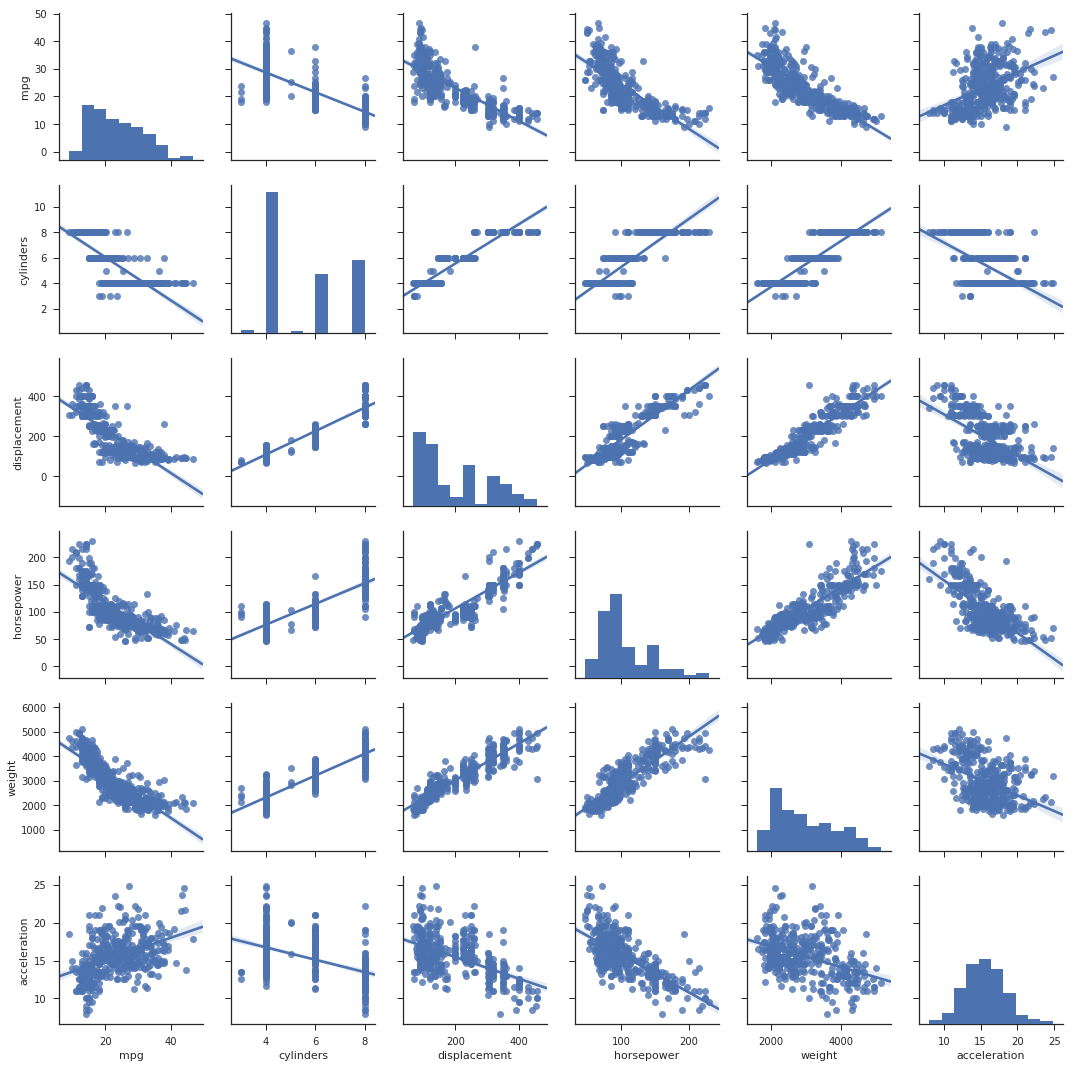

In [151]:
import seaborn as sns
df = mpg_data.drop(['model_year', 'origin'], axis=1).dropna()

sns.pairplot(df, kind="reg")

## Важное замечание о корреляции

<img src="https://cdn-images-1.medium.com/max/800/1*4fmkOy6670j8DIWxTcqRDg.gif">